# Guided Project: Popular Data Science Questions

In this scenario, we'll be working for a company that creates data science content, be it books, online articles, videos, or interactive text-based platforms like Dataquest. We are tasked with figuring out what is the best content to write about. But there is some leeway in what "best" means here.

We decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website called Stack Exchange. Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Here is a sample of the most popular sites:

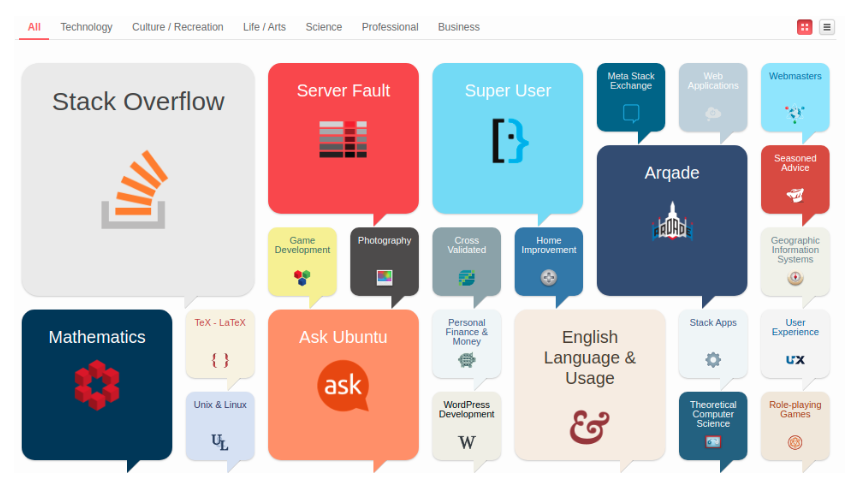

After spending some time investigating the website, we decide that the tags will be very useful in categorizing content. The data was stored in a file called `2019_questions.csv`. We'll read the file into a dataframe.

## Exploring the Data

In [1]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the file into a dataframe
df = pd.read_csv('2019_questions.csv')

In [3]:
# Print the first five rows
df.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


These are the explanation for each column:

* `Id`: An identification number for the post.
* `CreationDate`: The date and time of creation of the post.
* `Score`: The post's score.
* `ViewCount`: How many times the post was viewed.
* `Tags`: What tags were used.
* `AnswerCount`: How many answers the question got (only applicable to question posts).
* `FavoriteCount`: How many times the question was favored (only applicable to question posts).

Next, we are going to answer these questions:

* How many missing values are there in each column?
* Can we fix the missing values somehow?
* Are the types of each column adequate?
* What can we do about the `Tags` column?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [5]:
df['FavoriteCount'].isnull().value_counts()

True     7432
False    1407
Name: FavoriteCount, dtype: int64

We can see that only the `FavoriteCount` column has 7,432 missing data. This is likely just because those questions were not "favored". Thus, we can just fill the missing data with 0. We are likely have to clean the `Tags` column by removing the < and > signs, group them, and `value_counts` to get a sense of what topic that was most frequently answered or liked.

## Cleaning the Data

We'll want to transform the `Tags` column, so that the topics will be separated by the `,` sign. But first, we'll fill the missing values with 0. Next, we'll change the data type of CreationDate into datetime and FavoriteCount into integer. Lastly, we'll clean the `Tags` column and assign it back to itself.

In [6]:
# Fill the missing values with 0
df['FavoriteCount'] = df['FavoriteCount'].fillna(0).astype("int")

In [7]:
# Check again
df['FavoriteCount'].isna().value_counts()

False    8839
Name: FavoriteCount, dtype: int64

In [8]:
# Clean the Tags column
df['Tags'] = df['Tags'].str.replace("^<|>$","").str.split("><") # Replace "<" at the start of the string and ">" at the end of the string, and use the "><" as the split
df['Tags'].head()

C:\Users\Jason\AppData\Local\Temp\ipykernel_25712\1350339115.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tags'] = df['Tags'].str.replace("^<|>$","").str.split("><") # Replace "<" at the start of the string and ">" at the end of the string, and use the "><" as the split


0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

## Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [9]:
# Count how many times each tag was used
tag_used = {}

for tags in df['Tags']:
    for tag in tags:
        if tag in tag_used:
            tag_used[tag] += 1
        elif tag not in tag_used:
            tag_used[tag] = 1
            
tag_used_df = pd.DataFrame.from_dict(tag_used, orient="index")
tag_used_df.rename(columns={0:"Used"}, inplace=True)

In [10]:
most_used = tag_used_df.sort_values(by="Used", ascending=False).head(20)
most_used

,Used
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [11]:
# Count how many times each tag was viewed
tag_views = {}

for index, row in df.iterrows():
    views = row[3]
    tags = row[4]
    for tag in tags:
        if tag in tag_views:
            tag_views[tag] += views
        elif tag not in tag_views:
            tag_views[tag] = views

tag_views_df = pd.DataFrame.from_dict(tag_views, orient="index")
tag_views_df.rename(columns={0:"Views"},inplace=True)

In [12]:
most_viewed = tag_views_df.sort_values(by="Views", ascending=False).head(20)
most_viewed

,Views
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


<AxesSubplot:>

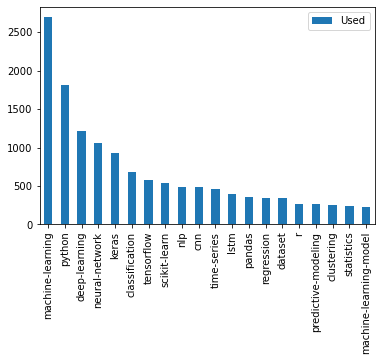

In [13]:
# Visualize each data
most_used.plot(kind="bar")

<AxesSubplot:>

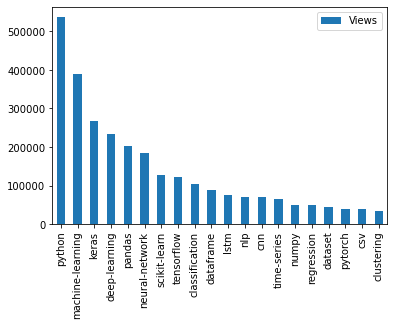

In [14]:
most_viewed.plot(kind="bar")

So, the results above show that Machine Learning, Python, and Deep Learning are the most popular topic on the site, with ML far above the second most popular topic. But what people actually care about is about Python with over 500,000 views.

## Relation Between Tags

We are going to see what tags are in `most_used`, but not in `most_viewed`.

In [15]:
# See values that are in most_used but not in most_viewed
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True) # Left merge will show values that are only in the left side

In [16]:
in_used

,Used,Views
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [17]:
# See values that are in most_viewed but not in most_used
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True) # Right merge will show values that are only in the right side

In [18]:
in_viewed

,Used,Views
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


The NaN values indicate that that value is present on one variable, but not on the other.

The tags present in `most_used` but not present in `most_viewed` are:

* r
* predictive-modeling
* statistics
* machine-learning-model

The tags present in `most_viewed` but not present in `most_used` are:

* dataframe
* numpy
* pytorch
* csv

In some cases, some tags are related to each other. For example, `python` and `pandas` are related since `pandas` is a Python library. Thus, by writing about pandas, we can tackle two tags.

## Just a Fad?

Before we make any recommendations, we should look for additional proof to soldify our findings. Perhaps, those topics are just fads, meaning that interests on those topics are slowing down. In this instance, we are going to focus on `deep-learning` topic. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period
* How many deep learning questions there are relative to the total amount of questions per time period.

In [19]:
# Read the file
all_questions = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])

In [20]:
# Generate some of the data
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [21]:
# Info about the type of the data
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


We are going to clean the `Tags` column in a similar manner to the df dataset above, and count the number of unique tag.

In [22]:
# Clean the Tags column
all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$","").str.split("><")
all_questions['Tags']

C:\Users\Jason\AppData\Local\Temp\ipykernel_25712\2158159225.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$","").str.split("><")


0            [python, keras, tensorflow, cnn, probability]
1                                         [neural-network]
2                            [python, ibm-watson, chatbot]
3                                                  [keras]
4        [r, predictive-modeling, machine-learning-mode...
                               ...                        
21571                                   [statistics, data]
21572       [machine-learning, neural-network, classifier]
21573                   [machine-learning, classification]
21574                                 [tensorflow, python]
21575                  [python, deep-learning, tensorflow]
Name: Tags, Length: 21576, dtype: object

In [23]:
# Count the number of unique tag
unique_tag = {}

for tags in all_questions['Tags']:
    for tag in tags:
        if tag in unique_tag:
            unique_tag[tag] += 1
        elif tag not in unique_tag:
            unique_tag[tag] = 1
            
unique_tag_df = pd.DataFrame.from_dict(unique_tag, orient="Index")
unique_tag_df.rename(columns={0:'Count'},inplace=True)
unique_tag_df = unique_tag_df.sort_values(by='Count',ascending=False)

In [24]:
unique_tag_df.head(20)

,Count
machine-learning,6969
python,3937
neural-network,2939
deep-learning,2805
classification,1899
keras,1750
scikit-learn,1307
tensorflow,1229
nlp,1170
r,1119


We will determine that `neural-network`, `keras`, `cnn`, and `lstm` are a part of `deep-learning` topic. The rest is about either `machine-learning` or `statistics`. Next, we are going to assign a binary number 1 if those topics include `deep-learning`, `neural-network`, and/or `keras`. Otherwise, we would assign a binary number 0.

In [25]:
# Create a function that assigns a binary number
def assign_binary(tags):
    for tag in tags:
        if tag in ['deep-learning', 'neural-network', 'keras', 'cnn', 'lstm']:
            return 1
    return 0

In [26]:
# Create a new column and apply the function
all_questions_1 = all_questions.copy()
all_questions_1['Binary_Number'] = all_questions_1['Tags'].apply(assign_binary)

In [27]:
all_questions_1

,Id,CreationDate,Tags,Binary_Number
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",0


In [28]:
# Fetch the quarter from nthe datetime
def fetch_quarter(datetime):
    year = str(datetime.year)[2:]
    month = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{m}".format(y=year, m=month)

all_questions_1['Quarter'] = all_questions_1['CreationDate'].apply(fetch_quarter)

In [29]:
all_questions_1

,Id,CreationDate,Tags,Binary_Number,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18Q3
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1,18Q3
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18Q3
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",0,18Q3


In [30]:
# Calculate the number of deep learning topics mentioned
quarterly = all_questions_1.groupby(by="Quarter").agg({"Binary_Number":["sum","size"]})
quarterly.columns = ["DeepLearning_Questions", "Total_Questions"]
quarterly["DeepLearning_Ratio"] = quarterly["DeepLearning_Questions"] / quarterly["Total_Questions"]
quarterly.sort_index(ascending=False)

,DeepLearning_Questions,Total_Questions,DeepLearning_Ratio
Quarter,,,
20Q1,138,459,0.300654
19Q4,670,2036,0.329077
19Q3,743,2394,0.310359
19Q2,772,2393,0.322608
19Q1,654,1987,0.329139
18Q4,437,1294,0.337713
18Q3,581,1512,0.384259
18Q2,461,1448,0.318370
18Q1,438,1221,0.358722


<AxesSubplot:xlabel='Quarter'>

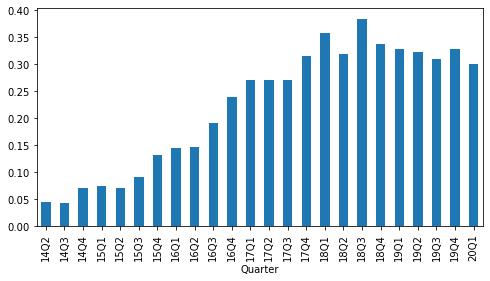

In [55]:
# Visualize the result
plt.figure(figsize=(8,4))
quarterly['DeepLearning_Ratio'].plot(kind="bar")

The results suggest that topics on `deep-learning` are gaining traction in the last couple years, suggesting that those topics are not fads. Therefore, we recommend that the company create contents on `deep-learning` topic.

## Next Steps

Next, we are going to soldify our conclusion with another proof by analyzing which topic has the most favorite counts.

In [31]:
# Count the favorite count on each topic
favorite_count = {}

for index, row in df.iterrows():
    tags = row[4]
    favorite = row[6]
    
    for tag in tags:
        if tag in favorite_count:
            favorite_count[tag] += favorite
        elif tag not in favorite_count:
            favorite_count[tag] = favorite

In [32]:
# Convert into a dataframe
favorite_count_df = pd.DataFrame.from_dict(favorite_count, orient="index")
favorite_count_df.rename(columns={0:"favorite_count"},inplace=True)
favorite_count_df = favorite_count_df.sort_values(by='favorite_count',ascending=False)

In [33]:
# Reset the index
favorite_count_df = favorite_count_df.reset_index()
favorite_count_df.rename(columns={"index":"topic"},inplace=True)
favorite_count_df.head(20)

,topic,favorite_count
0,machine-learning,575
1,python,325
2,deep-learning,266
3,neural-network,227
4,keras,181
5,classification,153
6,scikit-learn,113
7,cnn,100
8,time-series,97
9,nlp,94


It seems that it is between `machine-learning` and `deep-learning` topics. We are going to classify `classification`, `scikit-learn`, `nlp`, `tensor-flow`, `image-classification`, `feature-selection`, `feature-engineering`, and `predictive-modeling` into the `machine-learning` classification.

In [34]:
# Calculate the favorite_count for machine learning
desired_ml_topics = ['machine-learning','classification','scikit-learn','nlp','tensor-flow','image-classification','feature-selection','feature-engineering','predictive-modeling']
ml_topics = favorite_count_df[favorite_count_df['topic'].isin(desired_ml_topics)]
ml_topics

,topic,favorite_count
0,machine-learning,575
5,classification,153
6,scikit-learn,113
9,nlp,94
12,image-classification,59
14,feature-selection,51
15,feature-engineering,47
17,predictive-modeling,44


In [35]:
ml_topics['favorite_count'].sum()

1136

In [36]:
# Calculate the favorite_count for deep learning
desired_dl_topics = ['deep-learning', 'neural-network', 'keras', 'cnn', 'lstm']
dl_topics = favorite_count_df[favorite_count_df['topic'].isin(desired_dl_topics)]
dl_topics

,topic,favorite_count
2,deep-learning,266
3,neural-network,227
4,keras,181
7,cnn,100
10,lstm,88


In [37]:
dl_topics['favorite_count'].sum()

862

So, based on `FavoriteCount` column, `machine-learning` topic is the most favorite one. However, we should ask whether this topic is just a fad. Hence, we are going to employ a similar method from the one above.

In [38]:
# Create a copy
all_questions_2 = all_questions.copy()
all_questions_2.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [39]:
# Create a function
def assign_new_binary(tags):
    for tag in tags:
        if tag in ['machine-learning','classification','scikit-learn','nlp','tensor-flow','image-classification','feature-selection','feature-engineering','predictive-modeling']:
            return 1
    else:
        return 0

In [40]:
# Apply the function
all_questions_2['binary_number'] = all_questions_2['Tags'].apply(assign_new_binary)
all_questions_2

,Id,CreationDate,Tags,binary_number
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],0
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],0
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",1
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",1
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",0


In [41]:
# Create the function for quarter column
def create_quarter(datetime):
    year = str(datetime.year)[2:]
    month = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{m}".format(y=year,m=month)

all_questions_2['Quarter'] = all_questions_2['CreationDate'].apply(create_quarter)
all_questions_2.head()

,Id,CreationDate,Tags,binary_number,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],0,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],0,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",1,19Q1


In [42]:
# Aggregate based on quarter
quarterly_groupby = all_questions_2.groupby(by="Quarter").agg({"binary_number":['sum','size']})
quarterly_groupby.columns = ['machine-learning_questions','total_questions']
quarterly_groupby['ml_ratio'] = quarterly_groupby['machine-learning_questions'] / quarterly_groupby['total_questions']
quarterly_groupby.sort_index(ascending=False)

,machine-learning_questions,total_questions,ml_ratio
Quarter,,,
20Q1,228,459,0.496732
19Q4,957,2036,0.470039
19Q3,1139,2394,0.475773
19Q2,1137,2393,0.475136
19Q1,936,1987,0.471062
18Q4,631,1294,0.487635
18Q3,751,1512,0.496693
18Q2,740,1448,0.511050
18Q1,673,1221,0.551188


<AxesSubplot:xlabel='Quarter'>

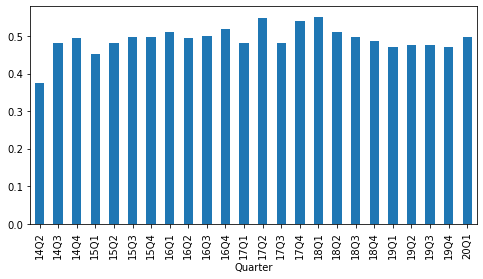

In [43]:
# Visualize the data above
plt.figure(figsize=(8,4))
quarterly_groupby['ml_ratio'].plot(kind='bar')

So, based on the results above, we can conclude that `machine-learning` topic is not a fad. Next, we are going to see which topic is the most used and viewed topic.

In [44]:
# Reset the index
in_used.reset_index(inplace=True)
in_viewed.reset_index(inplace=True)

In [45]:
# Total used for machine-learning
ml_used = in_used[in_used['index'].isin(desired_ml_topics)]
ml_used['Used'].sum()

4676

In [49]:
# Total viewed for machine-learning
ml_viewed = in_used[in_used['index'].isin(desired_ml_topics)]
ml_viewed['Views'].sum()

692448.0

In [50]:
# Total used for deep-learning
dl_used = in_used[in_used['index'].isin(desired_dl_topics)]
dl_used['Used'].sum()

4101

In [51]:
# Total viewed for deep-learning
dl_viewed = in_used[in_used['index'].isin(desired_dl_topics)]
dl_viewed['Views'].sum()

832410.0

## Conclusion

Our analysis shows that both `deep-learning` and `machine-learning` topics are not fad, as people remain interested in those topics. However, it is not a clear cut choice between `machine-learning` or `deep-learning` topics. Indeed, `machine-learning` leads in `FavoriteCount` and is the most used topic. However, `deep-learning` is the most frequently viewed topic. Perhaps, there are not as many quality contents on DL as on ML, thus explaining the difference in the favorite count. But the interest in deep-learning content remains high, given its total view. Therefore, in this case, we recommend the company focus on Deep Learning topic.